<a href="https://colab.research.google.com/github/kartik-mohan/Time_Series_Analysis_of_Household_Power_Consumption/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/SML_project/household_power_consumption.txt', sep=";", parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'], index_col='dt')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
Global_reactive_power,2049280.0,0.123714,0.112722,0.000,0.048,0.100,0.194,1.390
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2049280.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2049280.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2049280.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000


In [7]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Preliminary analysis

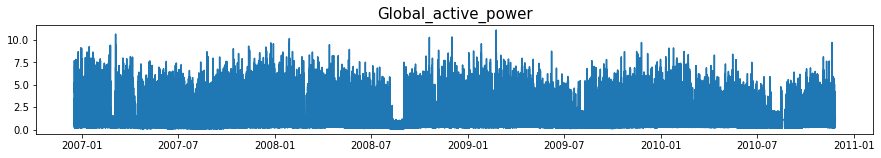

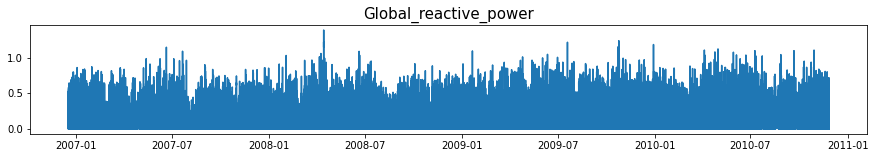

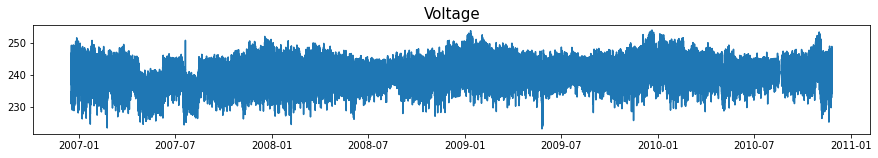

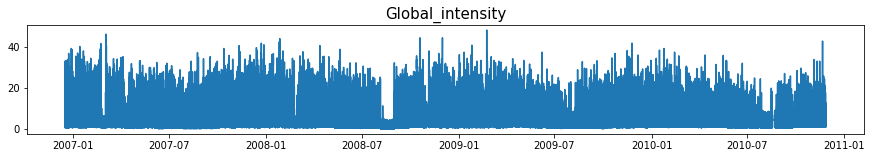

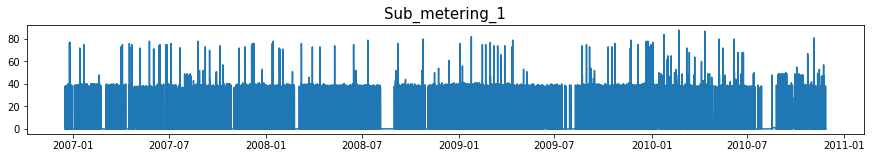

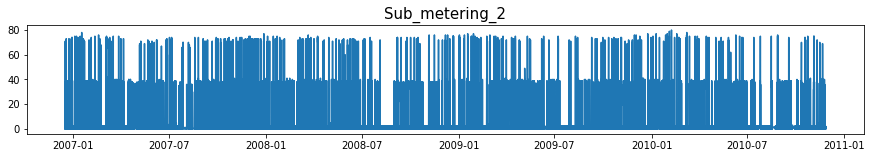

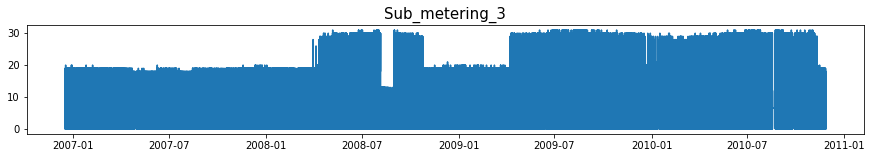

In [9]:
for i in df.columns :
  plt.figure(figsize=(15,2))
  y=df[i]
  plt.title(i,fontsize=15)
  plt.plot(df.index, y)

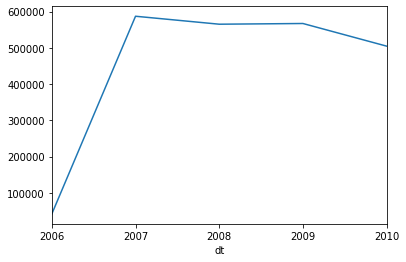

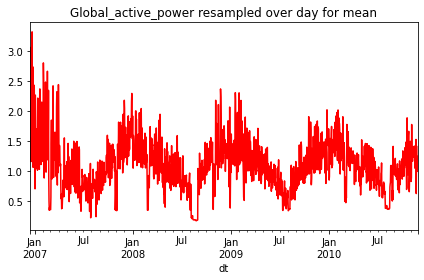

In [10]:
df.Global_active_power.resample('Y').sum().plot() 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

In [11]:
years = df.index.year.unique().to_list()
del years[0]
print(years)

[2007, 2008, 2009, 2010]


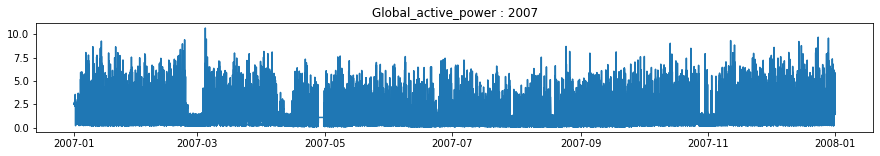

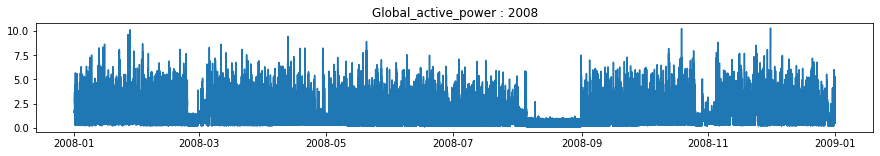

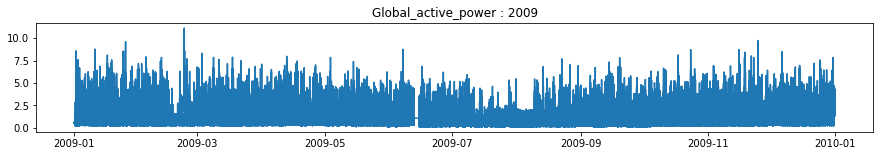

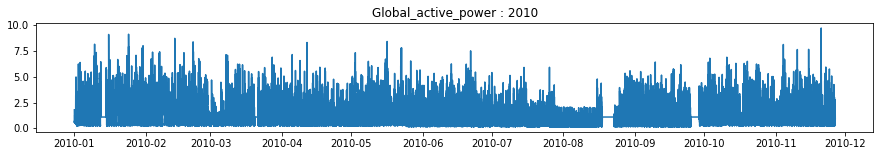

In [12]:
for i in years:
  plt.figure(figsize=(15,2))
  result = df[str(i)]
  plt.plot(result['Global_active_power'])
  plt.title('Global_active_power : ' + str(i))
  plt.show()

Around Feb-Mar & Aug-Sept a decrease in consumption.

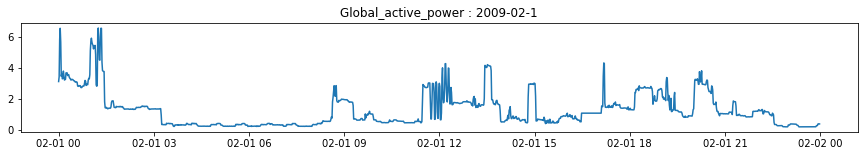

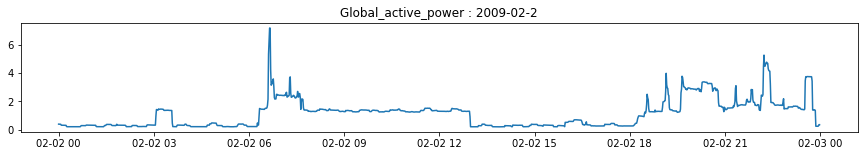

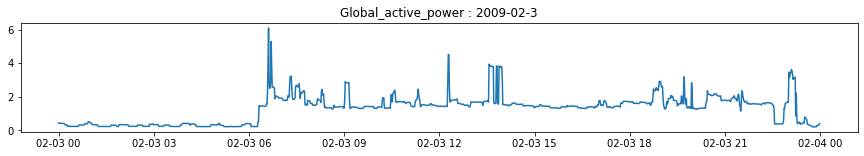

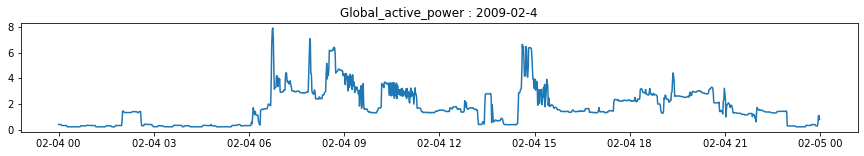

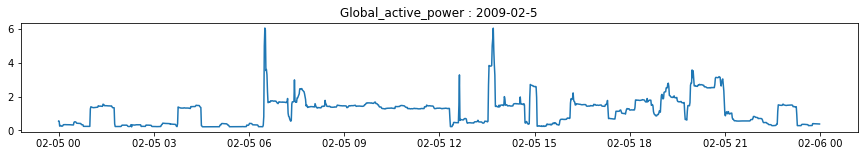

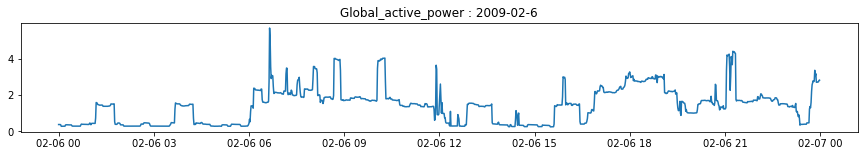

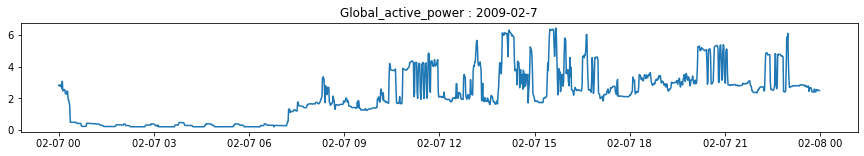

In [13]:
for i in range(1,8) :
  plt.figure(figsize=(15,2))
  day = '2009-02-' + str(i)
  result = df[day]
  plt.plot(result['Global_active_power'])
  plt.title('Global_active_power : ' + day)
plt.show()



Text(0.5, 0, ' ')

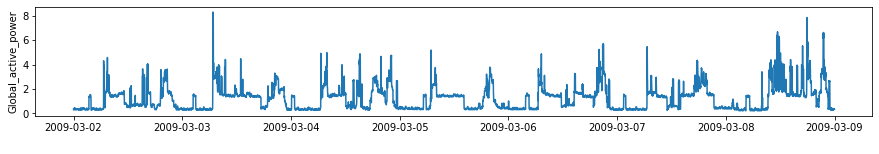

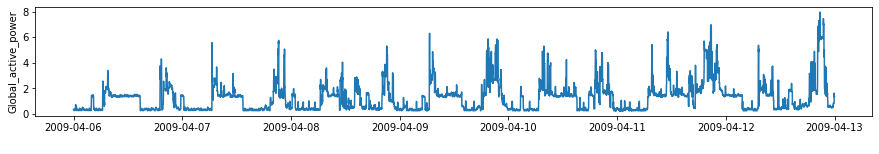

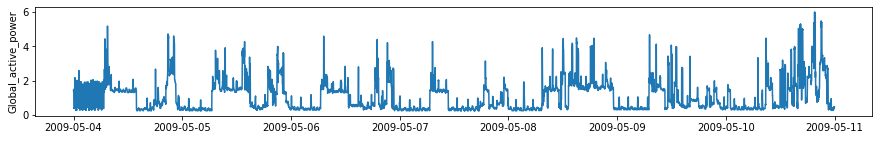

In [14]:
new_df=df.loc['2009-03-02 00:00:00':'2009-03-08 23:59:00']
#new_df["Day"] = pd.to_datetime(df["dt"]).dt.day_name()
plt.figure(figsize=(15,2))
sns.lineplot(x=new_df.index, y="Global_active_power", data=new_df)
plt.xlabel(" ")

new_df=df.loc['2009-04-06 00:00:00':'2009-04-12 23:59:00']
#new_df["Day"] = pd.to_datetime(df["dt"]).dt.day_name()
plt.figure(figsize=(15,2))
sns.lineplot(x=new_df.index, y="Global_active_power", data=new_df)
plt.xlabel(" ")

new_df=df.loc['2009-05-04 00:00:00':'2009-05-10 23:59:00']
#new_df["Day"] = pd.to_datetime(df["dt"]).dt.day_name()
plt.figure(figsize=(15,2))
sns.lineplot(x=new_df.index, y="Global_active_power", data=new_df)
plt.xlabel(" ")

## Time Series Data Distributions

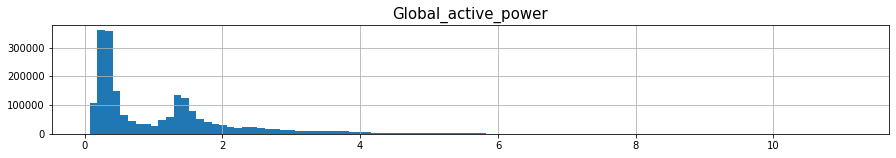

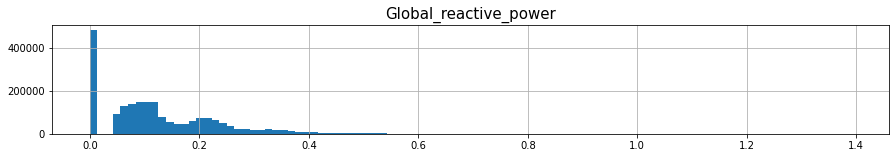

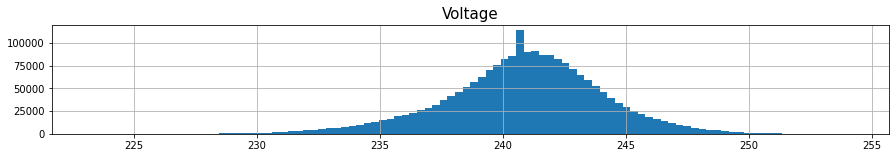

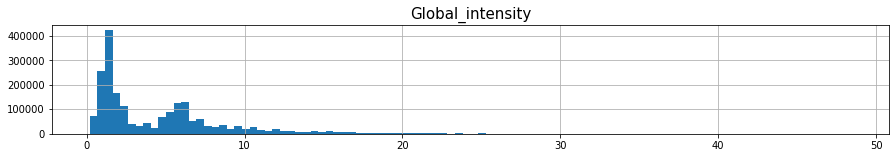

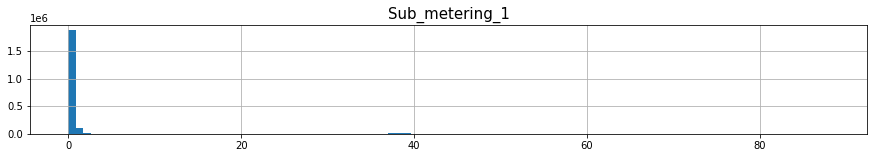

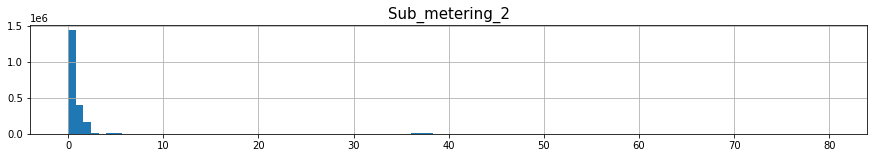

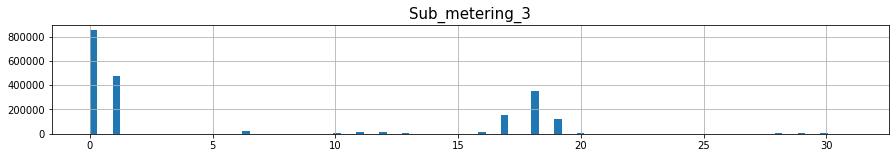

In [15]:
for i in df.columns :
  plt.figure(figsize=(15,2))
  df[i].hist(bins=100)
  plt.title(i,fontsize=15)
  plt.show()

We can see that active and reactive power, intensity, as well as the sub-metered power are all skewed distributions down towards small watt-hour or kilowatt values.

We can also see that distribution of voltage data is strongly Gaussian.

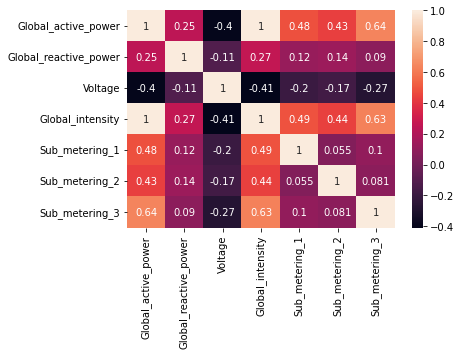

In [16]:
corr = np.corrcoef(df.corr())
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True)
plt.show()

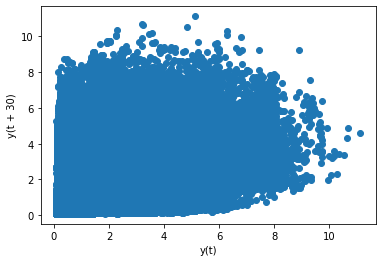

In [17]:
pd.plotting.lag_plot(df.Global_active_power, lag=30)